## Agrupar classes em grupos ex: Legumes, Arroz

In [1]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Pytorch: 1.8.1+cu102
Fastai: 2.3.1


In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from torchvision.utils import save_image
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import PIL 
import os

In [3]:
#pathToDataSet = "/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/"
pathToDataSet = "../../DiabetesLearning/dataset_v1/sizeOriginal/"
path_anno = pathToDataSet + 'gt/'
path_img = pathToDataSet + 'done/'
get_y_fn = lambda x : path_anno + f'{x.stem}_GT.png'


label_fnames = get_image_files(path_anno)
fnames = get_image_files(path_img)
print(len(fnames), len(label_fnames))



508 508


## Generate DataSet Histogram

In [4]:
totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[i]))
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))

print('Array Generated')


Array Generated


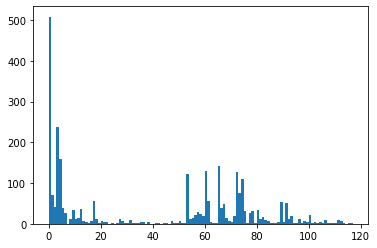

In [5]:
# histogram plot

codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] #pega apenas o ID de cada classe e ignora o nome

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionario = {}


for code, contagem in zip(codes, hist[0]):
    dicionario[code] = int(contagem)

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort



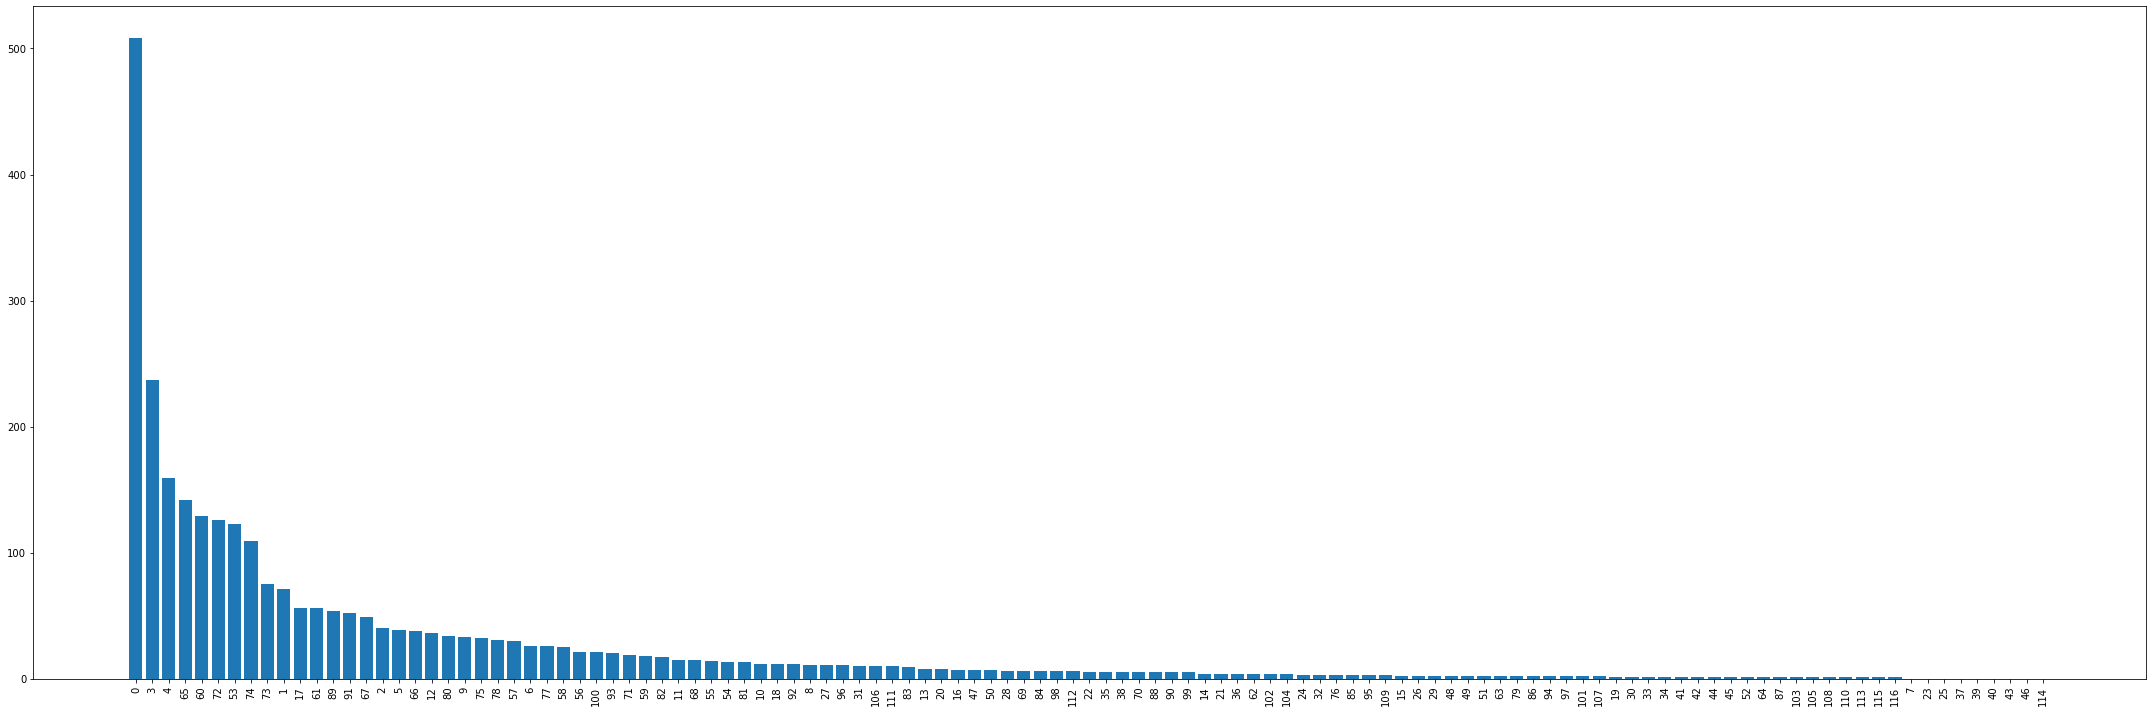

In [6]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
print('Class that most appears >>> ', list(dicionario.items())[1][0])
print('Appears >>> ', list(dicionario.items())[1][1], ' times')

Class that most appears >>>  3
Appears >>>  237  times


## Group Classes According to Drive Document

In [17]:
# get all ground truth images and label ids of each sample

allGTs = []
idsInGTs = []
for idx in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[idx]))
    arr = np.asarray(img)
    idsInGTs.append(list(np.unique(arr,return_counts=False)))
    allGTs.append(arr)


In [18]:
def getImagesByClass(classId):
    imagesWithClass = []
    imagesIdx = []

    for i in range(0, len(fnames)):
        arr = allGTs[i]
        idsInGT = idsInGTs[i]
        if int(classId) in idsInGT:
            imagesWithClass.append(fnames[i])
            imagesIdx.append(i)
            

    return imagesWithClass, imagesIdx

In [36]:
# remove all images with determined ids
eliminar = [16,52,64,97,103,105,108,116]

idxsToRemove = []

for classId in eliminar:
    classImages, imagesIdx = getImagesByClass(classId)
    idxsToRemove += imagesIdx

# remove selected images
idxsToRemove = list(set(idxsToRemove))

fnamesManySamplesPerClass = [fnames[i] for i in range(0,len(fnames)) if i not in idxsToRemove]
len(fnamesManySamplesPerClass)

SyntaxError: unmatched ')' (<ipython-input-36-c37d5ef55384>, line 14)

In [20]:
def replaceIds(idsToReplace, newId, groundTruth):
    for id in idsToReplace:
        groundTruth = np.where(groundTruth==int(id), newId, groundTruth)
        
    return groundTruth


In [11]:
tiposArroz = [[2,3,5,6,7], 118]
leguminosas = [[4,15,18,20,92], 119]
frutas = [[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,98,106,100], 120]
legumes = [[27,68,73,74,75,76,77,78,79,80,82,83,84,87,88,89,90], 121]
batatas = [[9,10,11,13,14,21,121,28,91], 122]
pure = [[12,19,26,29,101,104], 123]
salada = [[65,66,67,69,70,71,72,81,93,95,111], 124]
carneAnimal = [[53,54,55,56,57,58,59,60,94,99,109,110,113], 125]
massa = [[8,23,24,96], 126]
queijos = [[62,63,86,107,114,115], 127]
farofa = [[17], 128]
ovo = [[61], 129]
paes = [[49,50,51], 130]
torta = [[22, 25, 30], 131]
caldos = [[85,102,112], 132]


allSubstitutions = [tiposArroz, leguminosas, frutas, legumes, batatas, pure, salada, carneAnimal, massa, queijos, farofa, ovo, paes, torta,caldos]


In [12]:
def groundTruthWithGroupedClassesGenerator(groundTruth, allSubstitutions):
    for substitution in allSubstitutions:
        groundTruth = replaceIds(substitution[0], substitution[1], groundTruth)
    return groundTruth


## Check new dataset histogram

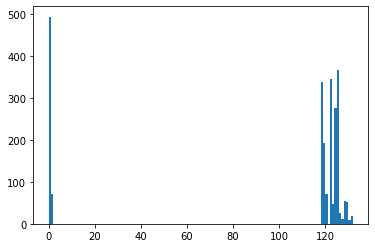

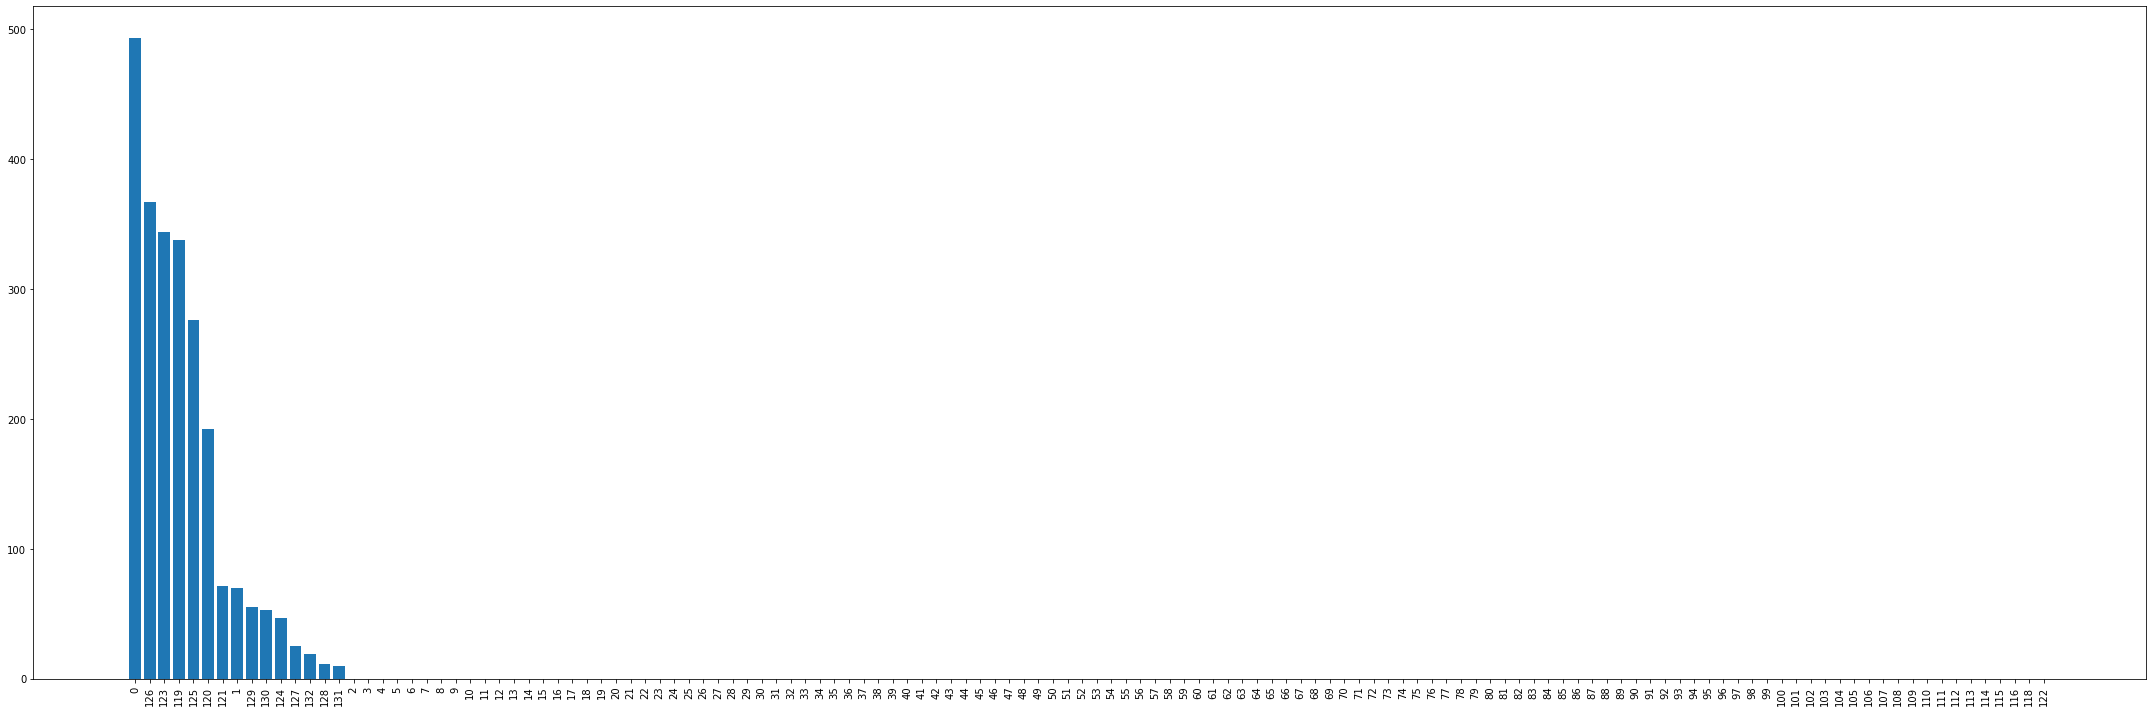

In [24]:
totalArray = []

for i in range(0,len(fnamesManySamplesPerClass)):
    img = Image.open(get_y_fn(fnamesManySamplesPerClass[i]))
    arr = np.asarray(img)
    arr = groundTruthWithGroupedClassesGenerator(arr, allSubstitutions) #array with altered classes ids
    totalArray += list(np.unique(arr,return_counts=False))

codes = np.loadtxt( 'classesNumberSprint1Complete.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] 

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionarioDataset = {}


for code, contagem in zip(codes, hist[0]):
    dicionarioDataset[code] = int(contagem)

dicionarioDataset = {k: v for k, v in sorted(dicionarioDataset.items(), key=lambda item: item[1], reverse=True)} #sort

plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionarioDataset.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Export new dataset

In [25]:
pathToSprintFolder = pathToDataSet + 'sprint1/'
pathToSprintFolderDone = pathToSprintFolder + 'done/'
pathToSprintFolderGT = pathToSprintFolder + 'gt/'

In [26]:
# create folder for new data

try: 
    os.mkdir(pathToSprintFolder)
    print('Created Sprint Folder')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderDone)
    print('Created Sprint Folder Done')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderGT)
    print('Created Sprint Folder GT')
except OSError as error:
    print(error)

Created Sprint Folder
Created Sprint Folder Done
Created Sprint Folder GT


In [27]:
# copy new data and their gts to this sprint folder

from shutil import copyfile

for i in range(0, len(fnamesManySamplesPerClass)):
    copyfile(str(fnamesManySamplesPerClass[i]), pathToSprintFolderDone + fnamesManySamplesPerClass[i].name)
    copyfile(get_y_fn(fnamesManySamplesPerClass[i]), pathToSprintFolderGT + fnamesManySamplesPerClass[i].stem + "_GT.png")
    

In [30]:
fnamesSprint1 = get_image_files(pathToSprintFolderDone)
print(len(fnamesSprint1))

493


In [35]:
get_y_fn_sprint1 = lambda x : pathToSprintFolderGT + f'{x.stem}_GT.png'

for i in range(0,len(fnamesSprint1)):
    img = Image.open(get_y_fn_sprint1(fnamesSprint1[i]))
    arr = np.asarray(img)
    arr = groundTruthWithGroupedClassesGenerator(arr, allSubstitutions) #array with altered classes ids
    imageToSave = Image.fromarray(arr)
    imageToSave.save(pathToSprintFolderGT + fnamesSprint1[i].stem + '_GT.png')
    print(pathToSprintFolderGT + fnamesSprint1[i].stem + '_GT.png')


inal/sprint1/gt/972_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/175_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/489_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/1082_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/187_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/1013_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/742_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/842_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/717_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/104_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/156_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/460_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/910_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/1092_GT.png
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint1/gt/120_GT.png
../.